In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

import bitcoin.db as db
df = db.get_all_data()
df.describe()

2018-03-29 18:08:39,370 root         INFO     Load data from SQL.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price,order_book_bids_price,order_book_bids_size,order_book_bids_num,order_book_asks_price,order_book_asks_size,order_book_asks_num,up
count,3.331100e+04,33311.000000,33311.000000,33311.000000,33311.000000,33311.000000,33311.000000,3.331100e+04,33311.000000,33311.000000,33311.000000,33311.000000,33311.000000,33311.000000,33311.000000,33311.000000,33311.000000,33311.000000
mean,1.521308e+09,7156.658918,7161.845322,7159.452000,7159.332958,1.586933,0.049847,6.441994e+05,0.058294,0.025289,3064.868084,2093.465911,0.695698,1.834049,2093.556035,0.687464,1.575636,0.318363
std,6.050218e+05,706.761499,706.905791,706.798242,706.806095,3.632604,0.068952,4.428754e+05,0.033599,0.057916,3428.965091,3119.029040,2.198621,4.028831,3119.159895,2.126943,3.414879,0.465848
min,1.520272e+09,5930.000000,5952.500000,5952.500000,5952.490000,0.000673,-0.165348,9.075000e+03,-0.028105,-0.108224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.520773e+09,6662.180000,6669.530000,6667.000000,6666.050000,0.124252,0.010916,3.065060e+05,0.033076,-0.013591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.521332e+09,7035.960000,7042.010000,7040.000000,7039.870000,0.467657,0.039061,5.184130e+05,0.058695,0.021777,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.521836e+09,7447.580000,7453.415000,7450.000000,7450.000000,1.524193,0.075258,8.898605e+05,0.082879,0.061401,6879.835000,6397.230000,0.112808,1.000000,6398.010000,0.240259,1.000000,1.000000
max,1.522340e+09,9399.000000,9399.000000,9399.000000,9399.000000,151.743171,0.612404,2.502159e+06,0.173389,0.211511,9689.110000,7266.540000,45.201705,58.000000,7266.550000,44.306710,40.000000,1.000000


In [5]:
from bitcoin.train import train
columns = ['open', 'google_sentiment']
history = train(df[columns].values, df[['close']].values)

2018-03-29 18:13:41,068 root         INFO     Train Model


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 200)            162400    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
__________

Epoch 30/60
23317/23317 [==============================] - 2s 96us/step - loss: 42.5457 - mean_squared_error: 0.1533 - mean_absolute_error: 0.2932 - val_loss: 40.5954 - val_mean_squared_error: 0.0859 - val_mean_absolute_error: 0.2428
Epoch 31/60
23317/23317 [==============================] - 2s 100us/step - loss: 40.6422 - mean_squared_error: 0.1498 - mean_absolute_error: 0.2896 - val_loss: 38.7516 - val_mean_squared_error: 0.0837 - val_mean_absolute_error: 0.2397
Epoch 32/60
23317/23317 [==============================] - 2s 98us/step - loss: 38.7972 - mean_squared_error: 0.1454 - mean_absolute_error: 0.2854 - val_loss: 36.9954 - val_mean_squared_error: 0.0837 - val_mean_absolute_error: 0.2406
Epoch 33/60
23317/23317 [==============================] - 2s 98us/step - loss: 37.0349 - mean_squared_error: 0.1402 - mean_absolute_error: 0.2800 - val_loss: 35.2891 - val_mean_squared_error: 0.0856 - val_mean_absolute_error: 0.2454
Epoch 34/60
23317/23317 [==============================] - 2s 9

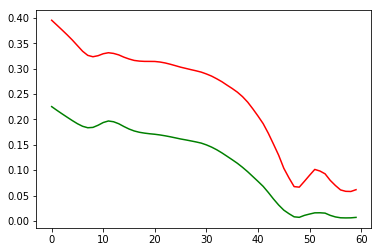

In [6]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error'], 'g')

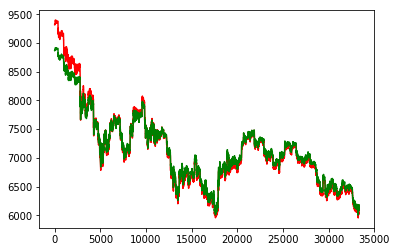

In [43]:
from keras.models import load_model
from sklearn.externals import joblib
import numpy as np

model = load_model('./model-BTC-EUR.h5')
scaler_x = joblib.load('model-scaler-x-BTC-EUR.pkl')
scaler_y = joblib.load('model-scaler-y-BTC-EUR.pkl')

X = np.array(df[['open', 'google_sentiment']])
X = scaler_x.transform(X)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

yp = model.predict(X)
yp = scaler_y.inverse_transform(yp)

plt.plot(df['close'], 'r')
plt.plot(yp, 'g')

In [48]:
import pandas as pd

df_computed = pd.DataFrame(columns=['real', 'predicted', 'diff'])
df_computed['open'] = df['open']
df_computed['real'] = df['close']
df_computed['google_sentiment'] = df['google_sentiment']
df_computed['predicted'] = yp
df_computed['diff'] = df['close'] - df_computed['predicted']
df_computed['computed'] = df_computed.apply(lambda x: x['predicted'] + 10 if x['diff'] < 0 else x['predicted'] -10, axis=1)
df_computed.describe()

,real,predicted,diff,open,google_sentiment,computed
count,33311.000000,33311.000000,33311.000000,33311.000000,33311.000000,33311.000000
mean,7159.332958,7163.510742,-4.148921,7159.452000,0.025289,7168.915219
std,706.806095,615.421570,103.838733,706.798242,0.057916,608.943290
min,5952.490000,6002.102051,-135.078125,5952.500000,-0.108224,6012.102051
25%,6666.050000,6727.383789,-58.612539,6667.000000,-0.013591,6737.383789
50%,7039.870000,7084.571289,-43.434180,7040.000000,0.021777,7094.571289
75%,7450.000000,7457.594971,-6.412910,7450.000000,0.061401,7466.359375
max,9399.000000,8917.829102,482.698008,9399.000000,0.211511,8907.829102


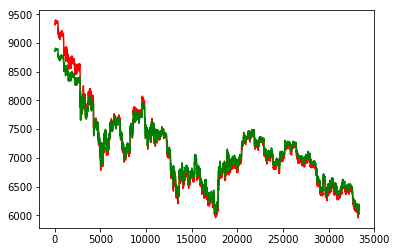

In [49]:
plt.plot(df['close'], 'r')
plt.plot(df_computed['computed'], 'g')

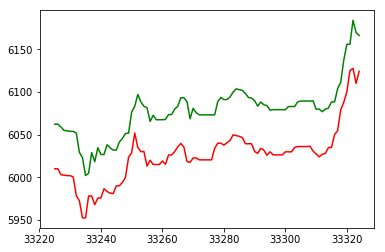

In [50]:
plt.plot(df[-100:]['close'], 'r')
plt.plot(df_computed[-100:]['predicted'], 'g')

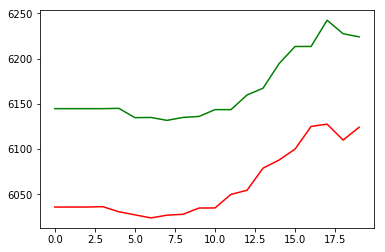

In [119]:
X = np.array(df_computed[-20:][['predicted', 'google_sentiment']])
X = scaler_x.transform(X)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

yp = model.predict(X)
yp = scaler_y.inverse_transform(yp)

close = df[-20:]['close'].reset_index()
plt.plot(close['close'], 'r')
plt.plot(yp, 'g')

[88.18]
[65.70800781]


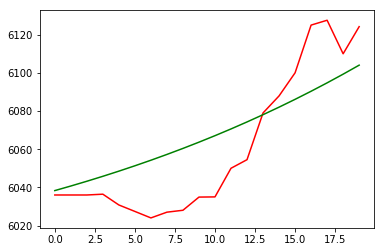

In [125]:
def in_X_min(X, google_sentiment, num=20):
    df = pd.DataFrame(columns=['pred'])
    last_predict = None
    for i in range(num):
        if last_predict is None:
            p = X
        else:
            p = last_predict
        X = np.array([p, google_sentiment]).reshape(1, -1)
        X = scaler_x.transform(X)
        X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

        syp = model.predict(X)
        syp = scaler_y.inverse_transform(syp)
        last_predict = syp - 51

        df = df.append({
            'pred': float(last_predict)
        }, ignore_index=True)
    return df

bg_open = float(df[-20:-19]['open'].values)
bg_google = float(df[-20:-19]['google_sentiment'].values)
df_pred_single = in_X_min(bg_open, bg_google, num=num)
plt.plot(close['close'], 'r')
plt.plot(df_pred_single['pred'], 'g')

print(df[-1:]['close'].values - df[-20:-19]['close'].values)
print(df_pred_single[-1:]['pred'].values - df_pred_single[0:1]['pred'].values)